In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

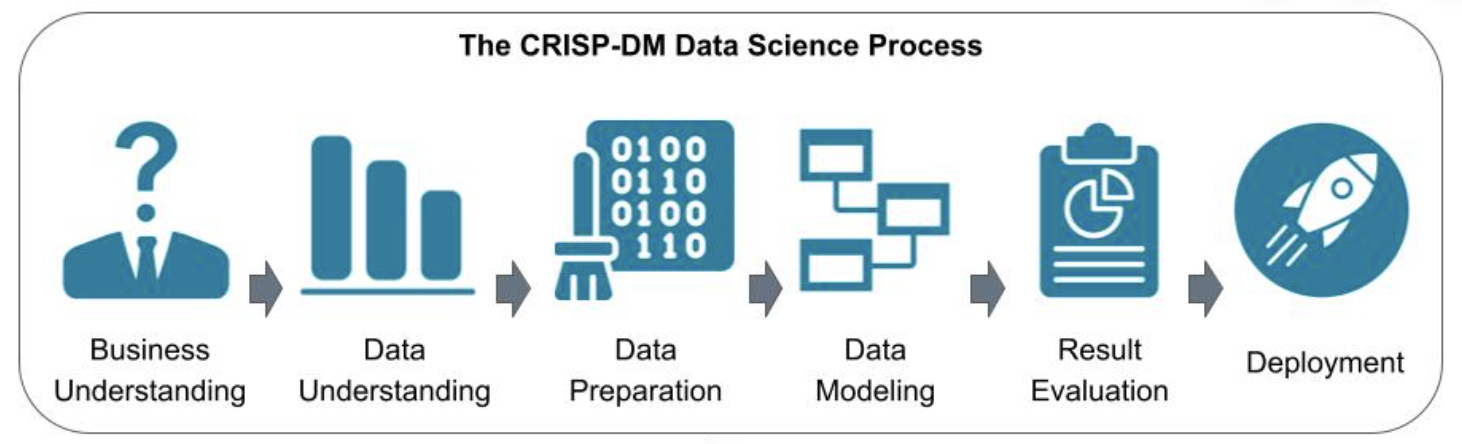
#  Lets take a look what are they

# Business Understanding
* This project's purpose is how to acquire new clients and how to determine an optimum price to offer our services to clients for income maximization.

# Brief description
* Here Airbnb  Seattle open dataset is going to be investigated for the price adjustment and for understanding of which features effects the accommodation prices.
* Here we have 3 datasets and these datasets will be analysed seperately and also together to extract some valuable information.

* Question 1 Here I am going to observe room prices regarding to date
* Question 2 Effects of features on price.
* Question 3 Finally we are going to investigate  guest comments and prices and try to predict price of accommodation regarding to the guest comments.
# Data Understanding
* Access and Explore
* Prepare Data
* Wrangle and Clean
* Modeling
* Fit model
* Validate the model
* * * Question 1
* Analyse
* Visualise
* Explain the visualisation
* * * Question 2
* Analyse
* Visualise
* Explain the visualisation
* * * Question 3
* Analyse
* Visualise
* Explain the visualisation
# **Evaluation**
# **Findings**


# Data Understanding

### Question 1 Here I am going to observe room prices regarding to date

Prepare Data

In [ ]:
# this dataframe shows  prices-dates-listing_id and availability
# so that we can may be extract some information of the seasonality of the prices 
df_cal=pd.read_csv("//kaggle/input/seattle/calendar.csv")
df_cal.head()


In [ ]:
# First of all I want to drop the rows that doesnt have price data
df_cal=df_cal.dropna(subset=["price"])
df_cal.head()

In [ ]:
#Let's check the unique values of the price column
print(df_cal.price.unique())

In [ ]:
#Let's check the unique values of the available column
print(df_cal.available.unique())
#Let's check distribution of the prices
# but because of this  we have to get rid of $ sign  and make price column int
df_cal["price"]=df_cal["price"].str.strip("$")
df_cal.head()
# str.strip is used with df.["column_name"]  if you try df.column_name it gives error.

In [ ]:
#Let's check the unique values of the available column again
print(df_cal.price.unique())

In [ ]:
# to be able to convert price column to float we replaced , with nothing...
df_cal["price"]=df_cal["price"].str.replace(",","")
print(df_cal.price.unique())

In [ ]:
# convert the prices to float
df_cal["price"]=df_cal["price"].astype(float)
df_cal.dtypes

In [ ]:
from matplotlib import pyplot as plt
# I want to visualise price distribution because of this I imported  pyplot
# Creating histogram
ax = df_cal.hist(column="price", bins=100,log=True, figsize=(12, 8))
# quantity distribution is too wide and so to be able to see outliers I used logaritmic histogram 
""""As you can see we have a skewed distribution as the price increases the available rooms decrease this also shows us there are
a few rich people to accomodate at hight price rooms. :) :) """

### Explain the visualisation

### As you can see we have a skewed distribution as the price increases the available rooms decrease this also shows us there are
### a few rich people to accomodate at hight price rooms. :) :) 

In [ ]:
# I checked if do I have nan value at date column
df_cal['date'].isnull().sum()

In [ ]:
# Now I want to format the date data of the dataframe  our data  has %Y-%m-%d  form because of that I am going to use to_datetime function 
#now we transformed our date data to datetime data
df_cal['date'] = pd.to_datetime(df_cal['date'],format="%Y-%m-%d")
df_cal['date']

In [ ]:
# dt.year extract  year value from the datetime data
df_cal['year'] = df_cal['date'].dt.year
df_cal.head()

In [ ]:
# I follow the same procedure  for month and day 
df_cal['month'] = df_cal['date'].dt.month
df_cal['day'] = df_cal['date'].dt.day
df_cal['day_name'] = df_cal['date'].dt.day_name()
df_cal['day_num'] = df_cal['date'].dt.weekday
df_cal.head()

In [ ]:
# Lets check which years are there in our dataframe
df_cal["year"].unique()
# great I am going to make my analysis from the beginning of 2016 to the end of 2016 so that I can drop 2017 data.

In [ ]:
#Drops the rows where year is 2017
df_cal.drop(df_cal[df_cal['year'] == 2017].index, inplace = True)
df_cal["year"].unique()

In [ ]:
#great lets  compare price data  regarding to the month  and day 
ax = df_cal.hist(column="price",by="month", bins=100,log=True, figsize=(12, 8))

In [ ]:
import seaborn as sns
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='day_name', y='price', data=df_cal, ax=axes[0])
sns.boxplot(x='month', y='price', data=df_cal, ax=axes[1])
axes[1].set_yscale("log")
axes[0].set_yscale("log")
# Set Title
axes[0].set_title('Day-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18);
plt.show()

### Explain the visualisation
**1. Reviews for first quetion**

* Here I can see that  Fridays and Saturday prices are increasing slightly.
* Beginning of the week and thursdays  we can see the minimum prices.
* Monday syndrome and overwhelming mid week can cause this.:)

![](https://cdn.hikb.at/charts/meteo-average-weather/seattle-meteo-average-weather.png)

* Then Lets take a look to monthly data  as you can see sunny days summer days, prices are increasing.
* It seems that tourism is booming, demand is booming between 6th, 9th months of the year.

### Question 2 Effects of features on price.

In [ ]:
# Ok lets go to the next dataframe listings.csv

df_listing=pd.read_csv("//kaggle/input/seattle/listings.csv")
df_listing.head()


Prepare Data

In [ ]:
# there are alot of columns so lets  check these column name to understand better
df_listing.columns
#df_listing["price"]
#df_listing["weekly_price"]
#df_listing["monthly_price"]

In [ ]:
# So lets compare the prices with some other features 
df_listing["price"]=df_listing["price"].str.strip("$")
df_listing["price"]=df_listing["price"].str.replace(",","")
df_listing["price"]=df_listing["price"].astype(float)
df_listing["weekly_price"]=df_listing["weekly_price"].str.strip("$")
df_listing["weekly_price"]=df_listing["weekly_price"].str.replace(",","")
df_listing["weekly_price"]=df_listing["weekly_price"].astype(float)
df_listing["monthly_price"]=df_listing["monthly_price"].str.strip("$")
df_listing["monthly_price"]=df_listing["monthly_price"].str.replace(",","")
df_listing["monthly_price"]=df_listing["monthly_price"].astype(float)


In [ ]:
# clean nan rows where prices have
df_listing.dropna(subset=["price","weekly_price","monthly_price"], inplace=True) 

In [ ]:
df_listing[["price","weekly_price","monthly_price"]]
df_listing.head()

In [ ]:
 df_listing.accommodates 

In [ ]:
# to quickly check the datas we can get something  I am going to use a heatmap
sns.heatmap(df_listing.corr())
plt.show()


In [ ]:
# here I created a correlation matrix 
corr_mtx=df_listing.corr().abs()

In [ ]:
# Unstack the matrix to filter
corr_list = corr_mtx.unstack()
# drop the nan values
corr_list.dropna(inplace=True)
# filtered the  strong correlated pairs
corr_strong = corr_list[corr_list>0.8][corr_list<1]
corr_strong


**2. Reviews for second question**
*  Actually data above doesnt give use a significant informations because mid to strong correlation coefficient datas are almost same type datas. 
* So that I am going to check weak to mid corellated datas.

In [ ]:
# filtered the  high correlated pairs
corr_high = corr_list[corr_list>0.5][corr_list<0.8]
corr_high

**2. Reviews for second question**

*  price____________accommodates          0.630279
*  _________________bathrooms             0.524216
*  _________________bedrooms              0.600145
*  _________________beds                  0.561753
*  weekly_price_____accommodates          0.635608
*  _________________bathrooms             0.502086
*  _________________bedrooms              0.581564
*  _________________beds                  0.555153
*  monthly_price____accommodates          0.609972
*  _________________bedrooms              0.560460
*  _________________beds                  0.524035
                             
**> Here we can see that  the size of the house and prices are related But actually this is not a surprising  info**

In [ ]:
corr_filtered_mid = corr_list[corr_list<0.5][corr_list>0.3]
corr_filtered_mid

**2. Reviews for second question**
* price                           guests_included                   0.394971
* weekly_price                    guests_included                   0.402296
* 
* Maybe this data can be interesting.  guests_included   feature is related with price. 
* So that this option can be taken into account for higher rent incomes.

In [ ]:
corr_filtered_weak = corr_list[corr_list<0.3][corr_list>0.2]
corr_filtered_weak

In [ ]:
corr_filtered_low = corr_list[corr_list<0.1][corr_list>0]
corr_filtered_low

In [ ]:
df_listing.shape

In [ ]:
df_cal.shape

### Question 3 Finally we are going to investigate guest comments and prices and try to predict price of accommodation regarding to the guest comments.

Prepare Data

In [ ]:
# ok right now I want to make a sentiment analysis and see  if high price accomodations  results with contant people of not
df_rew=pd.read_csv("//kaggle/input/seattle/reviews.csv")
df_rew.head()


In [ ]:
"""" to be able to achineve that I am going to merge  df_cal and df_rew however there are too many listing price for the same listing_id so that 
I am going to create a new dataframe that takes the average price for the same listing_id"""

df_price = df_cal.groupby("listing_id").agg({'price': ['mean']})
df_price.columns = df_price.columns.get_level_values(0)
#df_price = df_price.columns.droplevel(0)



In [ ]:
# here I am going to classify the price column regarding to this analysis from cheap to expencive and make this problem from continuous to
#classification
df_price.describe()

In [ ]:
df_price.hist(column="price", bins=100,log=True, figsize=(12, 8))

### lets assume  there are  10 price scale  with same bin sizes.
### 20-55   very cheap        1
### 55-70   cheap             2
### 70-83  cheap-moderate     3
### 83-95 moderate            4
### 95-110 fair               5
### 110-125 fair-high         6
### 125-150 high              7
### 150-180 high-luxirious    8
### 180-250 luxirious         9
### 250-1500 very-luxirious   10

In [ ]:

df_price["price"] = pd.qcut(df_price["price"],10, labels=["very cheap", "cheap", "cheap-moderate", "moderate", "fair", "fair-high", "high", "high-luxirious", "luxirious", "very-luxirious"])
df_price

In [ ]:
df_price_dummies = pd.get_dummies(df_price["price"])

df_price_dummies

In [ ]:
# now lets  put  price data into  df_rew dataframe
df_nlp = pd.merge(df_rew, df_price_dummies, how="left", on=["listing_id"])

df_nlp.dropna(subset=["comments"], inplace=True)

df_nlp.head()

In [ ]:
df_nlp["comments"].max()
!pip install langdetect

In [ ]:
from langdetect import detect
text = "War doesn't show who's right, just who's left."
if detect(text) == "en":
    print("english")
else:
    print("not english")

In [ ]:
detect(text)

In [ ]:

df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})
df = df.reset_index()  # make sure indexes pair with number of rows

for index, row in df.iterrows():
    print(row)

### Wrangle and Clean

In [ ]:
# x=0
# I am going to analyse only english messages
for index, row in df_nlp.iterrows():
    
    try:
        
        if detect(row['comments']) != 'en':
        #print(row)
            df_nlp.drop(index ,inplace=True)
    except:
        df_nlp.drop(index ,inplace=True)
        print("hata")
    #x=x+1
    #if x == 250:
        
        
df_nlp.shape

In [ ]:
df_nlp.dropna(subset=["very cheap", "cheap", "cheap-moderate", "moderate", "fair", "fair-high", "high", "high-luxirious", "luxirious", "very-luxirious"], inplace=True)
df_nlp.shape

In [ ]:
# I want to add one more feature there from the listing dataframe I am going to take 
#df_rev_score = df_listing[['id','review_scores_rating']].dropna()
#df_rev_score.rename(columns = {'id':'listing_id'}, inplace = True)
#df_rev_score.head()
#df_rev_score.shape


In [ ]:
#then lets merge with  df_nlp dataframe
#df_nlp = pd.merge(df_nlp, df_rev_score, how="outer", on=["listing_id"])
#df_nlp.head()


In [ ]:
# we are going to drop  nan values of  review_scores_rating after merging  rev scores and df_nlp dataframe 
# df_nlp.dropna(subset=["review_scores_rating"], inplace=True)
# df_nlp.shape


In [ ]:
"""here I am going to write a funtion that loads data for ML training
X is our input data and single colum messages and y  is 10 column price categories
"""
def load_data():
    
    X =df_nlp["comments"]
   
    y = df_nlp[["very cheap", "cheap", "cheap-moderate", "moderate", "fair", "fair-high", "high", "high-luxirious", "luxirious", "very-luxirious"]]
    return X, y

In [ ]:
"""here I want to write a tokenizer function 
tokenizer function is used to clean a text from stopwords, 
punctuation, uppercases and affixes
"""
import nltk
from nltk.tokenize import word_tokenize
import re
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download("wordnet")
from nltk.stem.wordnet import WordNetLemmatizer
def tokenize(text):
    text = text.lower()
    text= re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    #Split text into words using NLTK
    words = word_tokenize(text)
    
    # Remove stop words
    words = [w for w in words if w not in stopwords.words("english","")]
    
    # Reduce words to their root form
    lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
    
    return lemmed

In [ ]:
"""Here I am going to use a ML pipeline to analyse  review messages
I am goingto use RandomForestClassifier and MultiOutputClassifier as estimator
TfidfVectorizer is going to transform our comments column into a matrix form to be evaluated by our estimator"""
#from sklearn.utils import indexable, _safe_indexing
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
#from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y)

""""pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('score', transfomer_numeric)
            ])),
             ('text_features', Pipeline([
                ('selector', transformer_text),
                ('vec', TfidfVectorizer(tokenizer = tokenize))
            ]))
         ])),
    ('clf', RandomForestClassifier())
])"""
pipeline = Pipeline([('vec', TfidfVectorizer(tokenizer = tokenize)), ('clf', MultiOutputClassifier(RandomForestClassifier()))])

In [ ]:
# we train our model  it took 2 hours :(((
pipeline.fit(X_train, y_train)

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
""" lets take a look to the results
Here I am going to use classification_report function to evaluate prediction results
function input is  surely y_test dataset and our predictions y_pred 
and our output is classification_report results over our coulmn loop and  accuracy of each columns and  total accuracy"""
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def display_results(y_test, y_pred):
    column_names=y_test.columns
    df_pred=pd.DataFrame(y_pred, columns=column_names)
    for column in y_test:
        print(classification_report(y_test[column], df_pred[column], zero_division=0))
    
    accuracy = (y_pred == y_test).mean()
    print("Accuracy:", accuracy)
    print("Total Accuracy:", accuracy.mean())
    

In [ ]:
display_results(y_test, y_pred)

### 3. Question Reviews and comments

1. * ### Prediction results can be discussed from different dimensions and model can be improved by combining review scores.
2. * ### Here I want to share my ideas about model predictions; price scales and guest comments can have an alignment however comments are regarding to the people's income levels and expectation 
3. * ### so that to deduce this can lead us to make mistake. From the otherside this can be used as a price adjustment tool for hosts. If the guests comments point you out as a high-luxirious 
4. * ### price scale accommodation why  would you set your price as a moderate price scale accommodation. Actually here in this case Cheap price scale accommodation comment accuracy is the lowest category
5. * ### this can show us some of these class accommodations are really cheaper than expected.